In [1]:
# !pip install scikit-learn
# !pip install scipy
# !pip install imblearn
# !pip install wordcloud
# !pip install vaderSentiment
# !pip install spotipy
# !pip install auth

In [7]:
#Importing Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

from wordcloud import WordCloud, STOPWORDS
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from ipywidgets import widgets, interact

sns.set_style('darkgrid')

In [45]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vedan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vedan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
import sys
import spotipy
import spotipy.util as util
import configparser
import auth

from spotipy.oauth2 import SpotifyClientCredentials

c:\Users\vedan\SongHitPredictor\venv\Lib\site-packages\auth\__init__.py:3: DeprecatedWarning: Call to deprecated function __init__(...). API class may be removed in a future release, use falcon.App instead.
  from auth.CAS.REST.service import api


In [8]:
sys.path.append(os.getcwd())

In [9]:
#Loading Dataset
df = pd.read_csv("./data/songs_complete_data.csv")

In [10]:
#Viewing the first 5 rows of dataset
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,Artist,Title,Top100,URI,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration,Time_Signature,lyrics,explicit,Release_Year,Genre
0,1,linkin park,in the end,0,60a0Rd6pjrkxjPbaKzXjfq,0.556,0.864,3,-5.870,0,0.0584,0.009580,0.000000,0.209,0.400,105.143,216880,4,It starts with\nOne thing I don't know why\nIt...,0.0,2000,metal
1,2,the white stripes,seven nation army,0,7i6r9KotUPQg3ozKKgEPIN,0.737,0.463,0,-7.828,1,0.0792,0.008170,0.447000,0.255,0.324,123.881,231733,4,I'm gonna fight 'em all\nA seven nation army c...,1.0,2003,rock
2,3,red hot chili peppers,by the way,0,3ZOEytgrvLwQaqXreDs2Jx,0.618,0.938,9,-3.442,1,0.0456,0.017900,0.000000,0.167,0.875,91.455,269000,4,Standing in line\nTo see the show tonight\nAnd...,1.0,2002,rock
3,5,evanescence,bring me to life,0,0COqiPhxzoWICwFCS4eZcp,0.331,0.943,4,-3.188,0,0.0698,0.007210,0.000002,0.242,0.296,94.612,235893,4,"How can you see into my eyes, like open doors?...",0.0,2003,alternative
4,6,papa roach,last resort,0,5W8YXBz9MTIDyrpYaCg2Ky,0.589,0.890,4,-3.719,0,0.0603,0.000481,0.000820,0.201,0.692,90.598,199907,4,Cut my life into pieces\nThis is my last resor...,1.0,2001,metal


In [11]:
#Viewing the last 5 rows of dataset
df.tail()

,Unnamed: 0,Artist,Title,Top100,URI,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration,Time_Signature,lyrics,explicit,Release_Year,Genre
9221,14729,daddy yankee,dura,1,6KuqAtoeVzxAYOaMveLNpH,0.783,0.840,1,-3.416,1,0.0510,0.17400,0.0,0.4120,0.839,95.001,200480,4,Me gusta mi reggae\nTiritiritiririti-Daddy\n(E...,0.0,2018,reggae
9222,14730,xxxtentacion,changes,1,7AFASza1mXqntmGtbxXprO,0.669,0.308,11,-10.068,1,0.0290,0.88300,0.0,0.0984,0.520,64.934,121887,4,"Mmm, baby I don't understand this\nYou're chan...",0.0,2018,rap
9223,14731,luke combs,one number away,1,4gB7HrYHbJVJ5RFOjxmoq4,0.544,0.781,6,-6.160,0,0.0311,0.00585,0.0,0.1910,0.527,144.075,221800,4,Are you sitting at home all alone\nTrying to f...,0.0,2017,country
9224,14732,rae sremmurd,powerglide,1,1BuZAIO8WZpavWVbbq3Lci,0.713,0.831,1,-4.750,0,0.1500,0.01680,0.0,0.1180,0.584,173.948,332301,4,"Yeah, Yeah, Yeah\nMike WiLL Made-It\nYeah, Yea...",1.0,2018,rap
9225,14733,dua lipa,idgaf,1,76cy1WJvNGJTj78UqeA5zr,0.836,0.544,7,-5.975,1,0.0943,0.04030,0.0,0.0824,0.510,97.028,217947,4,You call me all friendly\nTellin' me how much ...,1.0,2017,pop


In [12]:
#to gather shape and size of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9226 entries, 0 to 9225
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        9226 non-null   int64  
 1   Artist            9226 non-null   object 
 2   Title             9226 non-null   object 
 3   Top100            9226 non-null   int64  
 4   URI               9226 non-null   object 
 5   Danceability      9226 non-null   float64
 6   Energy            9226 non-null   float64
 7   Key               9226 non-null   int64  
 8   Loudness          9226 non-null   float64
 9   Mode              9226 non-null   int64  
 10  Speechiness       9226 non-null   float64
 11  Acousticness      9226 non-null   float64
 12  Instrumentalness  9226 non-null   float64
 13  Liveness          9226 non-null   float64
 14  Valence           9226 non-null   float64
 15  Tempo             9226 non-null   float64
 16  Duration          9226 non-null   int64  


In [13]:
#checking unique year of release in dataset
df.Release_Year.unique()

array([2000, 2003, 2002, 2001, 2008, 2007, 2009, 2004, 2006, 1999, 2005,
       2018, 2017, 2014, 2010, 2011, 2013, 2016, 1993, 1985, 1994, 1962,
       1978, 1983, 2015, 1984, 1972, 1997, 1992, 1998, 1971, 1968, 1965,
       1969, 1964, 1966, 1967, 1963, 1990, 1961, 1996, 1973, 1989, 1988,
       1977, 1980, 1970, 1987, 1981, 1974, 1979, 1975, 1991, 1976, 1986,
       1982, 1995, 2019, 2020, 2012, 1958, 1955, 1959, 1957, 1960, 1954,
       1945, 1946, 1956, 1950, 1951], dtype=int64)

In [14]:
twokdf = df.drop(df[(df['Release_Year'] < 2000)].index)
twokdf.Release_Year.unique()

array([2000, 2003, 2002, 2001, 2008, 2007, 2009, 2004, 2006, 2005, 2018,
       2017, 2014, 2010, 2011, 2013, 2016, 2015, 2019, 2020, 2012],
      dtype=int64)

We decide to limit our dataset to songs post 2000 as music trends change rapidly and the characteristics that were central to making songs hits also change over time.

In [15]:
twokdf.Genre.unique()

array(['metal', 'rock', 'alternative', 'pop', 'rap', 'jazz', 'reggae',
       'country', 'classical', 'edm'], dtype=object)

In [16]:
df.columns

Index(['Unnamed: 0', 'Artist', 'Title', 'Top100', 'URI', 'Danceability',
       'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration',
       'Time_Signature', 'lyrics', 'explicit', 'Release_Year', 'Genre'],
      dtype='object')

In [17]:
#to gather shape and size of data
print(twokdf.shape)
twokdf.info()

(7323, 22)
<class 'pandas.core.frame.DataFrame'>
Index: 7323 entries, 0 to 9225
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7323 non-null   int64  
 1   Artist            7323 non-null   object 
 2   Title             7323 non-null   object 
 3   Top100            7323 non-null   int64  
 4   URI               7323 non-null   object 
 5   Danceability      7323 non-null   float64
 6   Energy            7323 non-null   float64
 7   Key               7323 non-null   int64  
 8   Loudness          7323 non-null   float64
 9   Mode              7323 non-null   int64  
 10  Speechiness       7323 non-null   float64
 11  Acousticness      7323 non-null   float64
 12  Instrumentalness  7323 non-null   float64
 13  Liveness          7323 non-null   float64
 14  Valence           7323 non-null   float64
 15  Tempo             7323 non-null   float64
 16  Duration          7323 non-null   in

c:\Users\vedan\SongHitPredictor\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


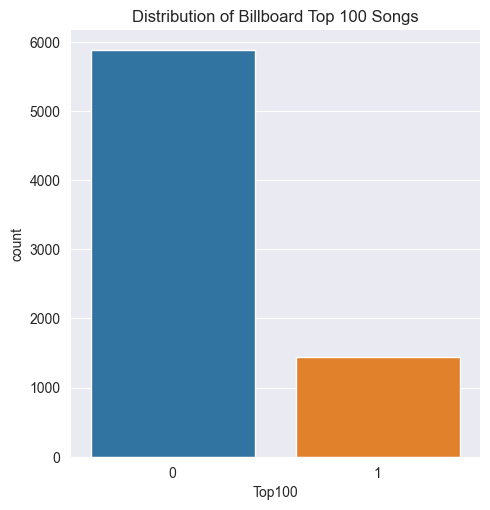

Number of songs in the Top 100: 1448
Number of songs not in the Top 100: 5875


In [18]:
fig1 = sns.catplot(x="Top100", kind="count", data=twokdf)
fig1.set(title='Distribution of Billboard Top 100 Songs')
plt.show()
top100_counts = twokdf['Top100'].value_counts()
print("Number of songs in the Top 100:", top100_counts[1])
print("Number of songs not in the Top 100:", top100_counts[0])

We can clearly see that our dataset is imbalanced and has more non-hits than hits. We define a song to be a hit if it had an appearance on the billboard top 100 year end chart after it's release. We recognize that this dataset could potentially cause a problem where our model just predicts every song is a non-hit to increase accuracy.

In [19]:
#checking null values in dataset
twokdf.isnull().sum()

Unnamed: 0            0
Artist                0
Title                 0
Top100                0
URI                   0
Danceability          0
Energy                0
Key                   0
Loudness              0
Mode                  0
Speechiness           0
Acousticness          0
Instrumentalness      0
Liveness              0
Valence               0
Tempo                 0
Duration              0
Time_Signature        0
lyrics              261
explicit              0
Release_Year          0
Genre                 0
dtype: int64

WILL need to drop the songs without lyrics when we run sentiment analysis on the lyrics.

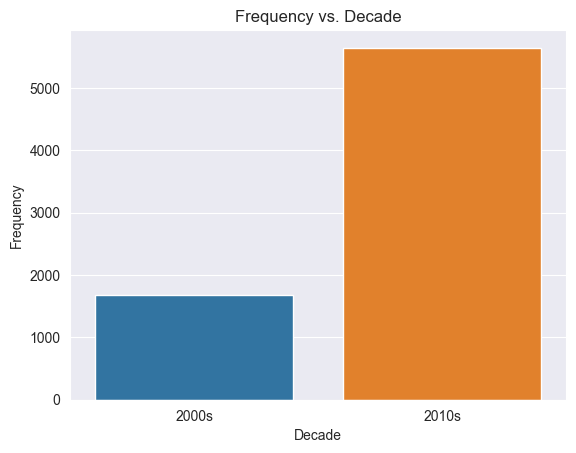

Number of songs from the 00s: 1680
Number of songs from the 10s: 5643


In [20]:
decade_00 = twokdf[(twokdf.Release_Year >= 2000) & (twokdf.Release_Year < 2010)].shape[0]
decade_10 = twokdf[(twokdf.Release_Year >= 2010) & (twokdf.Release_Year <= 2020)].shape[0]
decades = ['2000s', '2010s']
decade_frq = [decade_00, decade_10]
fig2 = sns.barplot(x=decades, y=decade_frq)
fig2.set(xlabel='Decade', ylabel='Frequency', title='Frequency vs. Decade')
#fig2.figure.savefig("../images/fig-vs-decade.png")
plt.show()
print("Number of songs from the 00s:", decade_00)
print("Number of songs from the 10s:", decade_10)

In [21]:
le = LabelEncoder()

# Fit the LabelEncoder to the 'genres' column
le.fit(twokdf['Genre'])

# Transform the 'genres' column to integer codes
twokdf['Genre_code'] = le.transform(twokdf['Genre'])

# Print the mapping between genre names and codes
print("Genre codes:")
for code, genre in zip(le.transform(le.classes_), le.classes_):
    print(f"{genre}: {code}")

Genre codes:
alternative: 0
classical: 1
country: 2
edm: 3
jazz: 4
metal: 5
pop: 6
rap: 7
reggae: 8
rock: 9


Creating a new feature that encodes a feature name to a number to see whether genre is a good predictior.

In [22]:
pd.set_option('display.max_columns', None)
twokdf.head()

,Unnamed: 0,Artist,Title,Top100,URI,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration,Time_Signature,lyrics,explicit,Release_Year,Genre,Genre_code
0,1,linkin park,in the end,0,60a0Rd6pjrkxjPbaKzXjfq,0.556,0.864,3,-5.870,0,0.0584,0.009580,0.000000,0.209,0.400,105.143,216880,4,It starts with\nOne thing I don't know why\nIt...,0.0,2000,metal,5
1,2,the white stripes,seven nation army,0,7i6r9KotUPQg3ozKKgEPIN,0.737,0.463,0,-7.828,1,0.0792,0.008170,0.447000,0.255,0.324,123.881,231733,4,I'm gonna fight 'em all\nA seven nation army c...,1.0,2003,rock,9
2,3,red hot chili peppers,by the way,0,3ZOEytgrvLwQaqXreDs2Jx,0.618,0.938,9,-3.442,1,0.0456,0.017900,0.000000,0.167,0.875,91.455,269000,4,Standing in line\nTo see the show tonight\nAnd...,1.0,2002,rock,9
3,5,evanescence,bring me to life,0,0COqiPhxzoWICwFCS4eZcp,0.331,0.943,4,-3.188,0,0.0698,0.007210,0.000002,0.242,0.296,94.612,235893,4,"How can you see into my eyes, like open doors?...",0.0,2003,alternative,0
4,6,papa roach,last resort,0,5W8YXBz9MTIDyrpYaCg2Ky,0.589,0.890,4,-3.719,0,0.0603,0.000481,0.000820,0.201,0.692,90.598,199907,4,Cut my life into pieces\nThis is my last resor...,1.0,2001,metal,5


In [23]:
def check_featuring(title):
    if "feat." in title.lower():
        return 1
    else:
        return 0

twokdf["Featuring"] = twokdf["Title"].apply(check_featuring)

Creating a new feature that checks if the song titles have featuring artists and creates a new column filled with 0s and 1s to indicate the presence of featuring artists

c:\Users\vedan\SongHitPredictor\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


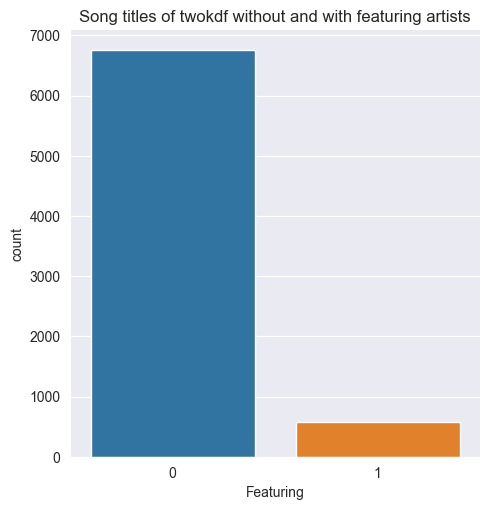

Number of songs with features 571
Number of songs without features: 6752


In [24]:
fig2 = sns.catplot(x="Featuring", kind="count", data=twokdf)
fig2.set(title='Song titles of twokdf without and with featuring artists')
plt.show()
feat_counts = twokdf['Featuring'].value_counts()
print("Number of songs with features", feat_counts[1])
print("Number of songs without features:", feat_counts[0])

In [25]:
X = twokdf.drop(["Unnamed: 0", "Artist", "Title", "URI", "lyrics", "Genre", "Release_Year"], axis=1)

Dropping categorical variables for training

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7323 entries, 0 to 9225
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Top100            7323 non-null   int64  
 1   Danceability      7323 non-null   float64
 2   Energy            7323 non-null   float64
 3   Key               7323 non-null   int64  
 4   Loudness          7323 non-null   float64
 5   Mode              7323 non-null   int64  
 6   Speechiness       7323 non-null   float64
 7   Acousticness      7323 non-null   float64
 8   Instrumentalness  7323 non-null   float64
 9   Liveness          7323 non-null   float64
 10  Valence           7323 non-null   float64
 11  Tempo             7323 non-null   float64
 12  Duration          7323 non-null   int64  
 13  Time_Signature    7323 non-null   int64  
 14  explicit          7323 non-null   float64
 15  Genre_code        7323 non-null   int32  
 16  Featuring         7323 non-null   int64  
dtype

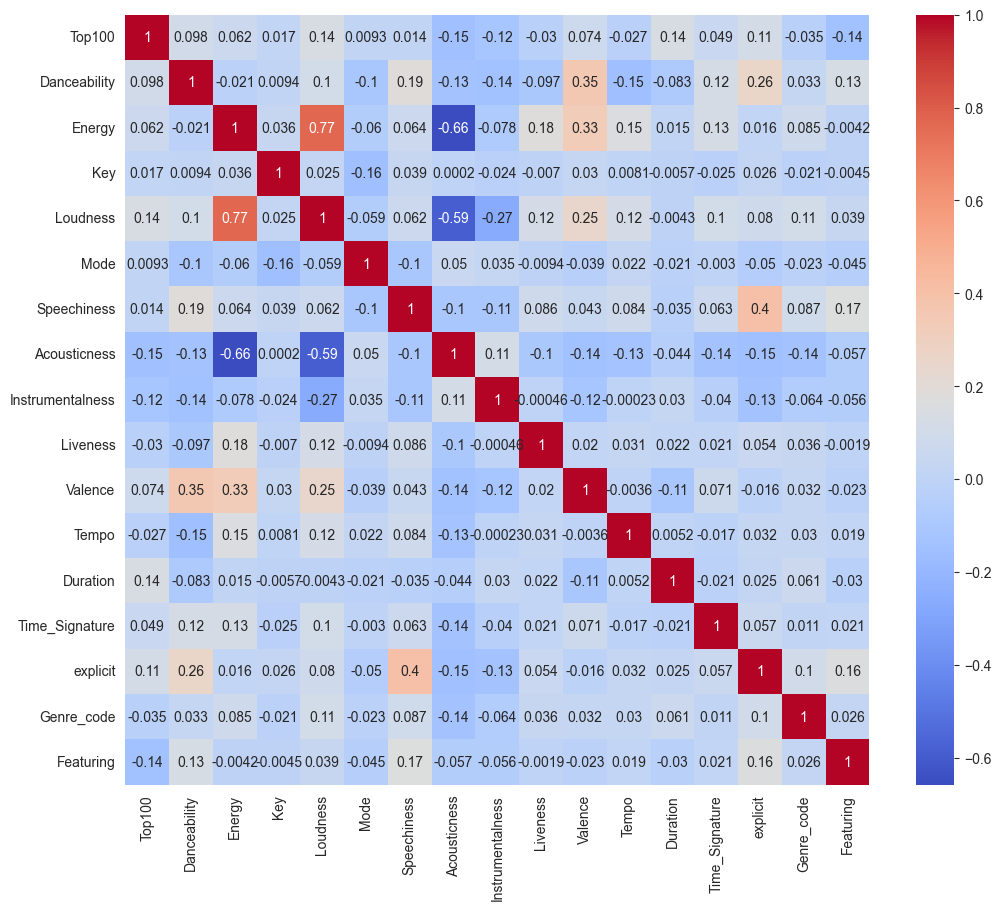

In [27]:
corr_matrix = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display heatmap
plt.show()

The maximum absoulte value of the correlation coefficient with the target variable is seen with loudness, acousticness, instrumentalness, duration explicit and featuring. Might need to add information regarding correlation among the above mentioned variables

In [28]:
X = X.drop(["Top100"], axis=1)
y = twokdf["Top100"]

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.2, random_state=42)
print(X.shape)
print(X_res.shape)

(7323, 16)
(11750, 16)


We use **SMOTE (Synthetic Minority Over-sampling Technique)** to balance this dataset. It identifies the class with fewer instances, which is considered the minority class. SMOTE creates synthetic samples by interpolating features between the selected instance and its k nearest neighbors. It randomly selects a specific amount of synthetic samples to generate based on the desired level of oversampling. Now we have a 1:1 ratio of both classes. If asked we used SMOTE because it was mentioned in 2 papers related to hit song science.

In [29]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)
f1_LRscore = f1_score(y_test, y_pred)
print(f1_LRscore)

0.6609686609686609


In [30]:
accuracyLRscore = accuracy_score(y_test, y_pred)
print(accuracyLRscore)

0.49361702127659574


We beleive that the logistic regression model does poorly as it assumes linear relationships between features and target variable. It also does a poorer job of figuring out feature performance.

In [31]:
dt = DecisionTreeClassifier(max_depth=13)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
f1_DTscore = f1_score(y_test, y_pred)
print(f1_DTscore)

0.8054298642533937


In [32]:
accuracyDTscore = accuracy_score(y_test, y_pred)
print(accuracyDTscore)

0.7987234042553192


The DT could be our baseline model. Results above are from test set. We can reduce max_depth to prevent overfitting.

In [33]:

rf=RandomForestClassifier(n_estimators=100, max_depth = 13)
rf.fit(X_train, y_train)
y_pred_RF = rf.predict(X_test)

f1_RFscore = f1_score(y_test, y_pred_RF)
print(f1_RFscore)

0.8557980316645272


In [34]:
accuracyRFscore = accuracy_score(y_test, y_pred_RF)
print(accuracyRFscore)

0.8565957446808511


We see improved performance compared to DT classifier.

In [35]:
# create a dictionary to hold the results
results = {'Model': ['Decision Tree', 'Random Forest'],
           'Accuracy': [accuracyDTscore, accuracyRFscore],
           'F1 Score': [f1_DTscore, f1_RFscore]}

# create a pandas dataframe from the dictionary
df_model_score = pd.DataFrame(results)

# print the dataframe
print(df_model_score)

           Model  Accuracy  F1 Score
0  Decision Tree  0.798723  0.805430
1  Random Forest  0.856596  0.855798


In [36]:
# create a dictionary to hold the results
results = {'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
           'Accuracy': [accuracyLRscore, accuracyDTscore, accuracyRFscore],
           'F1 Score': [f1_LRscore, f1_DTscore, f1_RFscore]}

# create a pandas dataframe from the dictionary
df_model_score = pd.DataFrame(results)

# print the dataframe
print(df_model_score)

                 Model  Accuracy  F1 Score
0  Logistic Regression  0.493617  0.660969
1        Decision Tree  0.798723  0.805430
2        Random Forest  0.856596  0.855798


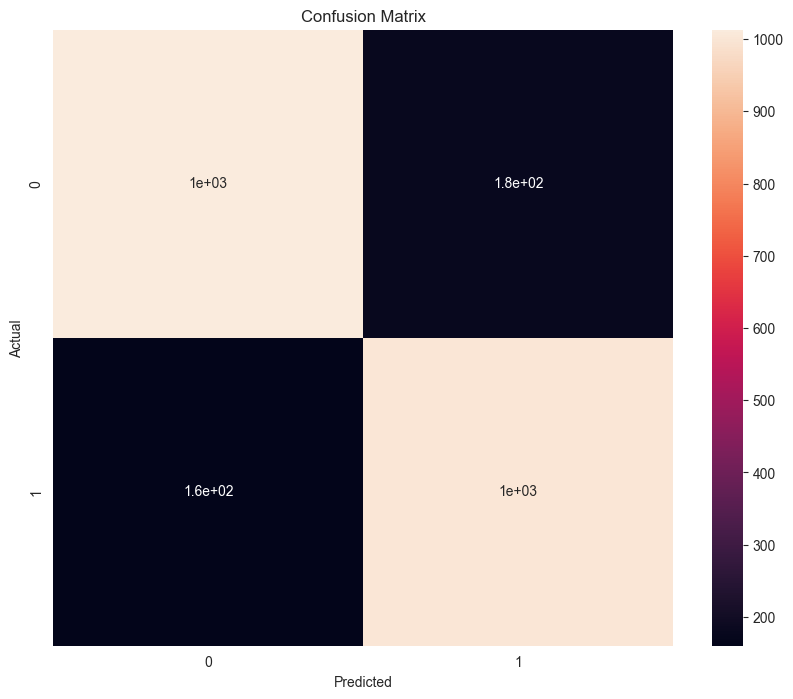

In [37]:
cm = confusion_matrix(y_test, y_pred_RF)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

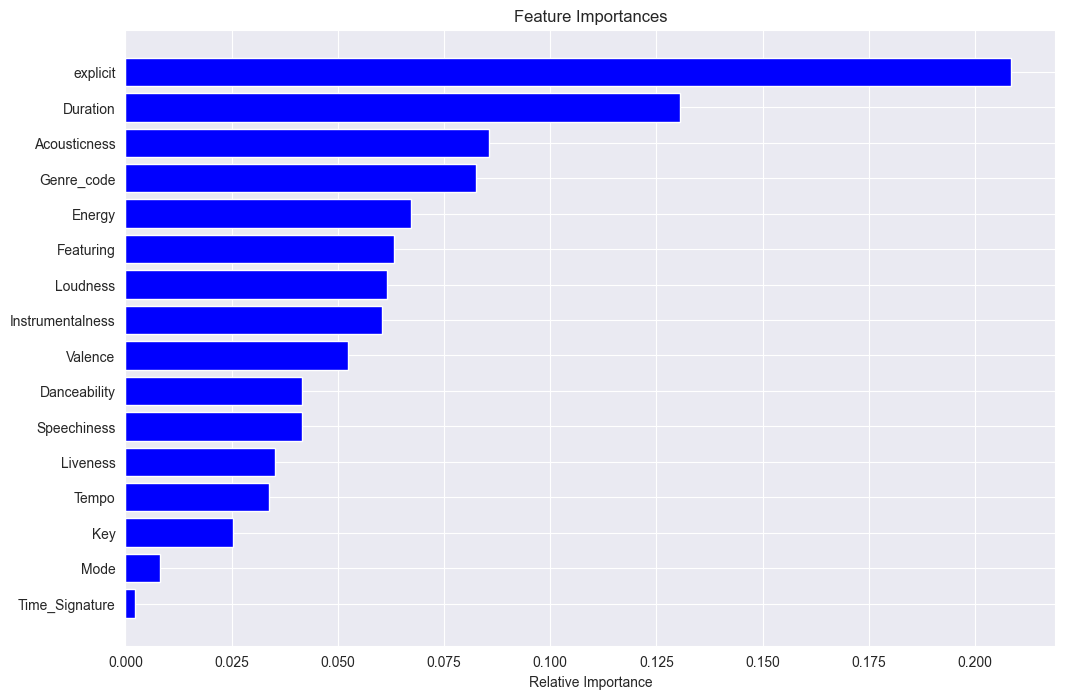

In [38]:
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [39]:
# Sort features based on importance
sorted_indices = np.argsort(importances)[::-1]

# Select top K features
top_k = 4
selected_features = X_train.columns[sorted_indices[:top_k]]

# Use selected features for training and testing
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train and evaluate the model using selected features
rf_selected = RandomForestClassifier(n_estimators=100, max_depth = 50)
rf_selected.fit(X_train_selected, y_train)
y_pred_selected = rf_selected.predict(X_test_selected)
f1_score(y_test, y_pred_selected)

0.7844155844155843

In [40]:
accuracy_score(y_test, y_pred_selected)

0.7880851063829787

Using top k feature selection seems to decreasing testing score but the model is still overfitting. Only thing that really helps to prevent overfitting is reducing number of estimators and reducing max_depth.

In [41]:
# Create a feature selector based on feature importances
selector = SelectFromModel(rf, threshold='median')

# Fit the selector to training data
selector.fit(X_train, y_train)

# Transform the training and testing data based on selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Train and evaluate the model using selected features
rf_selected = RandomForestClassifier(n_estimators=100, max_depth = 12)
rf_selected.fit(X_train_selected, y_train)
y_pred_selected = rf_selected.predict(X_test_selected)
f1_score(y_test, y_pred_selected)


0.832979175520612

In [42]:
accuracy_score(y_test, y_pred_selected)

0.8327659574468085

Slightly better test performance with selectfrommodel feature selection but still overfits. max_depth = 12 gives a training accuracy of around 90% and testing accuracy is around 80%.

Shows **feature importance for the random forest classifier**, can use this to perform feature selection to pick top K features. This will simplify the model and hopefully lead to better generalization. (We can also do recursive feature elimination, if this doesn't produce better results)

It starts with One thing I don't know why It doesn't even matter how hard you try Keep that in mind, I designed this rhyme To explain in due time All I know Time is a valuable thing Watch it fly by as the pendulum swings Watch it count down to the end of the day The clock ticks life away It's so unreal It's so unreal, didn't look out below Watch the time go right out the window Tryna hold on, did-didn't even know I wasted it all just to watch you go Watch you go I kept everything inside and even though I tried, it all fell apart What it meant to me will eventually be a memory of a time when I tried so hard I tried so hard And got so far But in the end It doesn't even matter ... 


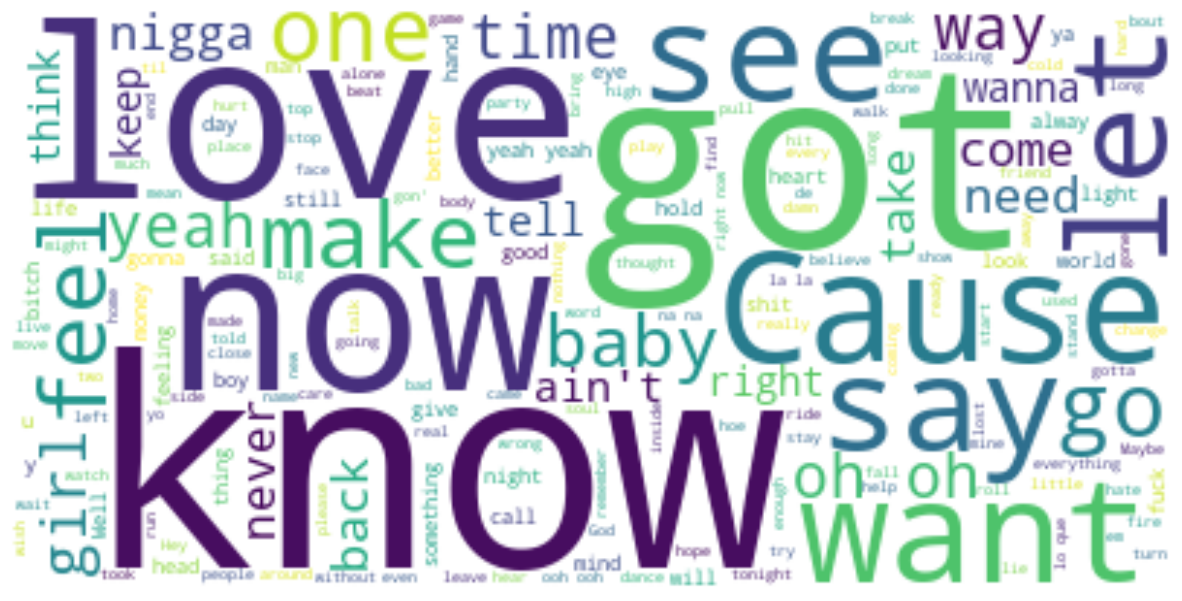

In [43]:
def clean_txt(song):
    song = ' '.join(song.split("\n"))
    song = re.sub("[\[].*?[\]]", "", song)
    song = re.sub("\s+", " ", song)
    return song

df_cleaned = twokdf.copy()
df_cleaned = df_cleaned.dropna() #Drop song if we don't have lyrics

df_cleaned.loc[:, 'lyrics'] = df_cleaned['lyrics'].apply(lambda x: clean_txt(x))
print(df_cleaned['lyrics'][0])

word_cloud = df_cleaned['lyrics'].values
lyrics_text = ' '.join(word_cloud)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(lyrics_text)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In the above code, we cleaned the lyrics column to drop values that were null, and as the lyrics contained \n for newlines, we cleaned it to only have spaces between words by replacing it. Furthermore, the following **wordcloud shows the most common words among the songs**.

In [46]:
stop_words = set(stopwords.words('english'))

def len_lyrics(song):
    return len(song.split())

def len_unique_lyrics(song):
    return len(list(set(song.split())))

def rmv_stop_words(song):
    song = [w for w in song.split() if not w in stop_words]
    return len(song)

def rmv_set_stop_words(song):
    song = [w for w in song.split() if not w in stop_words]
    return len(list(set(song)))

df_cleaned['len_lyrics'] = df_cleaned['lyrics'].apply(lambda x: len_lyrics(x))
df_cleaned['len_unique_lyrics'] = df_cleaned['lyrics'].apply(lambda x: len_unique_lyrics(x))
df_cleaned['without_stop_words'] = df_cleaned['lyrics'].apply(lambda x: rmv_stop_words(x))
df_cleaned['unique_without_stop_words'] = df_cleaned['lyrics'].apply(lambda x: rmv_set_stop_words(x))

In [ ]:
# plt.figure(figsize=(12,8))
# plt.hist(df_cleaned[df_cleaned['len_lyrics']<2000]['len_lyrics'], bins=70) #Not plot outliers
# plt.title("Number of words")
# plt.show()

In [ ]:
# np.mean(df_cleaned['len_lyrics'])
# np.mean(df_cleaned['len_unique_lyrics'])

In [47]:
analyzer = SentimentIntensityAnalyzer()

df_cleaned['sentimentVaderPos'] = df_cleaned['lyrics'].apply(lambda x: analyzer.polarity_scores(x)['pos'])
df_cleaned['sentimentVaderNeg'] = df_cleaned['lyrics'].apply(lambda x: analyzer.polarity_scores(x)['neg'])
df_cleaned['sentimentVaderComp'] = df_cleaned['lyrics'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df_cleaned['sentimentVaderNeu'] = df_cleaned['lyrics'].apply(lambda x: analyzer.polarity_scores(x)['neu'])

To determine if a song is positive, negative, neutral we have used **Valence Aware Dictionary and sEntiment Reasoner (VADER)**, a lexicon and rule-based sentiment analysis tool. Although there are better techniques for sentiment analaysis with the use of NLP now, for a brief understyanding of sentiment analysis we can use VADER to get some idea of the sentiment in our case as we do not have labeled data or a trained model for song sentiment classification.

In [48]:
df_cleaned['Vader'] = df_cleaned['sentimentVaderPos'] - df_cleaned['sentimentVaderNeg']

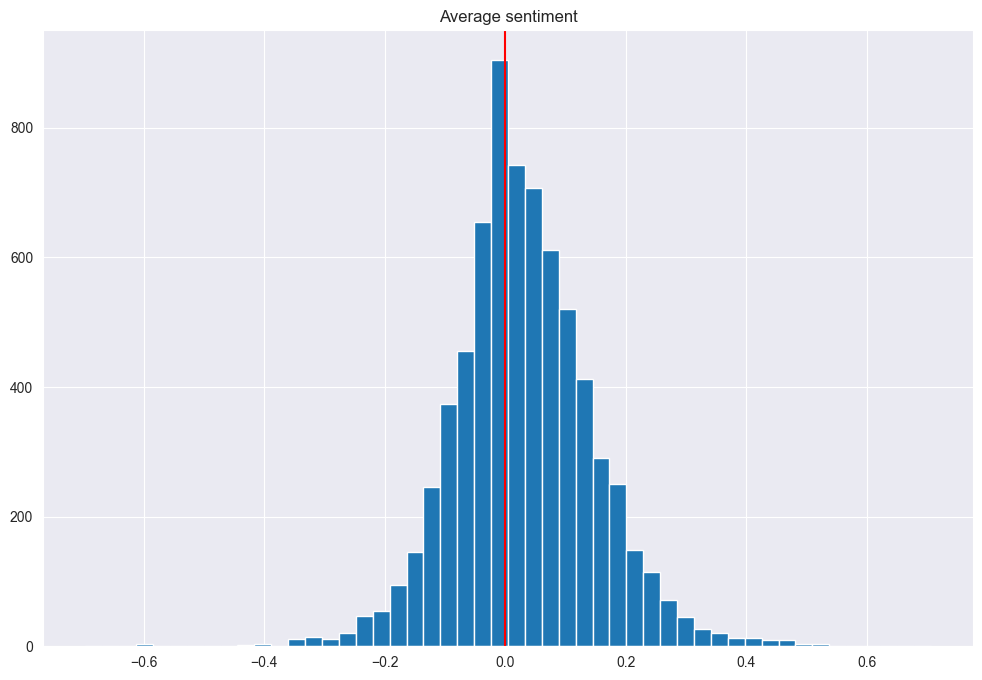

In [49]:
plt.figure(figsize=(12,8))
plt.hist(df_cleaned['Vader'], bins=50)
plt.axvline(0, c='r')
plt.title("Average sentiment")
plt.show()

As we can see from the above histogram, after running sentiment analysis on the lyrics, the average sentiment is slightly positive. The snetiment has its limitations however as the sentiment analyser computes the average sentiment of a song by taking the average of the words sentiment but does not take into account the context and content of the lyrics as a whole but of specific words instead.

The following is the random forest and decision trees applied along with the new columns including sentiment analysis of lyrics and have attributes ragrding lyrics.

In [50]:
df_cleaned.columns

Index(['Unnamed: 0', 'Artist', 'Title', 'Top100', 'URI', 'Danceability',
       'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration',
       'Time_Signature', 'lyrics', 'explicit', 'Release_Year', 'Genre',
       'Genre_code', 'Featuring', 'len_lyrics', 'len_unique_lyrics',
       'without_stop_words', 'unique_without_stop_words', 'sentimentVaderPos',
       'sentimentVaderNeg', 'sentimentVaderComp', 'sentimentVaderNeu',
       'Vader'],
      dtype='object')

In [51]:
final_df = df_cleaned.drop(["Unnamed: 0", "Artist", "Title", "URI", "lyrics", "Genre", "Release_Year"], axis=1)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7062 entries, 0 to 9225
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Top100                     7062 non-null   int64  
 1   Danceability               7062 non-null   float64
 2   Energy                     7062 non-null   float64
 3   Key                        7062 non-null   int64  
 4   Loudness                   7062 non-null   float64
 5   Mode                       7062 non-null   int64  
 6   Speechiness                7062 non-null   float64
 7   Acousticness               7062 non-null   float64
 8   Instrumentalness           7062 non-null   float64
 9   Liveness                   7062 non-null   float64
 10  Valence                    7062 non-null   float64
 11  Tempo                      7062 non-null   float64
 12  Duration                   7062 non-null   int64  
 13  Time_Signature             7062 non-null   int64  
 1

In [52]:
X = final_df.drop(["Top100"], axis=1)
y = final_df["Top100"]

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.2, random_state=42)
print(X.shape)
print(X_res.shape)

(7062, 25)
(11274, 25)


In [53]:
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
f1_DTscore = f1_score(y_test, y_pred)
print(f1_DTscore)

0.8


In [54]:
accuracyDTscore = accuracy_score(y_test, y_pred)
print(accuracyDTscore)

0.7889135254988914


In [55]:
rf=RandomForestClassifier(n_estimators=100, max_depth = 13)
rf.fit(X_train, y_train)
y_pred_RF = rf.predict(X_test)

f1_RFscore = f1_score(y_test, y_pred_RF)
print(f1_RFscore)

0.8585322723253757


In [57]:
y_pred_train = rf.predict(X_train)
accuracy_train_RF_score = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {accuracy_train_RF_score}")

accuracyRFscore = accuracy_score(y_test, y_pred_RF)
print(f"Testing Accuracy: {accuracyRFscore}")

Training Accuracy: 0.9515467346712496
Testing Accuracy: 0.8580931263858093


To predict whether a new song will be a hit or not using our trained random forest classifier, we can follow the steps below:

Prepare the input data for the song you want to predict. Make sure that it has the same format as our training data (i.e., same columns and data types). We will remove the "Top100" column from this input data.

Use the predict() method of our trained random forest classifier (rf) to generate the prediction for our input data. This will give us a binary prediction (0 or 1) indicating whether the song is predicted to be a hit or not.

Use the predict_proba() method of our trained random forest classifier to generate the probability of the prediction. This will give us a probability score between 0 and 1, indicating the likelihood of the song being a hit.

In [58]:
# Prepare input data for prediction
new_song_data = pd.DataFrame({
    'Danceability': 0.8,
    'Energy': 0.6,
    'Key': 2,
    'Loudness': -7.2,
    'Mode': 1,
    'Speechiness': 0.18,
    'Acousticness': 0.3,
    'Instrumentalness': 0.0,
    'Liveness': 0.15,
    'Valence': 0.75,
    'Tempo': 120.0,
    'Duration': 240000,
    'Time_Signature': 4,
    'explicit': 1,
    'Genre_code': 5,
    'Featuring': 0,
    'len_lyrics': 150,
    'len_unique_lyrics': 90,
    'without_stop_words': 120,
    'unique_without_stop_words': 80,
    'sentimentVaderPos': 0.5,
    'sentimentVaderNeg': 0.1,
    'sentimentVaderComp': 0.75,
    'sentimentVaderNeu': 0.35,
    'Vader': 1.0
}, index=[0])

# Drop the "Top100" column from the input data
# new_song_data = new_song_data.drop('Top100', axis=1)

# Generate the prediction for the new song
prediction = rf.predict(new_song_data)

# Generate the probability of the prediction
probability = rf.predict_proba(new_song_data)[:,1]

print("Prediction: ", prediction[0])
print("Probability: ", probability[0])


Prediction:  1
Probability:  0.8540968862602503


In [59]:
twokdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7323 entries, 0 to 9225
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7323 non-null   int64  
 1   Artist            7323 non-null   object 
 2   Title             7323 non-null   object 
 3   Top100            7323 non-null   int64  
 4   URI               7323 non-null   object 
 5   Danceability      7323 non-null   float64
 6   Energy            7323 non-null   float64
 7   Key               7323 non-null   int64  
 8   Loudness          7323 non-null   float64
 9   Mode              7323 non-null   int64  
 10  Speechiness       7323 non-null   float64
 11  Acousticness      7323 non-null   float64
 12  Instrumentalness  7323 non-null   float64
 13  Liveness          7323 non-null   float64
 14  Valence           7323 non-null   float64
 15  Tempo             7323 non-null   float64
 16  Duration          7323 non-null   int64  
 17  

The following code is for the demo of taking any song input in the form of an artist name and song name and then using our model to predict if the song is a hit or not.

In [60]:
X = twokdf.drop(["Unnamed: 0", "Artist", "Title", "URI", "lyrics", "Genre", "Release_Year", "Top100", "explicit", "Genre_code"], axis=1)

y = twokdf["Top100"]

print(X.info())

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.2, random_state=42)
print(X.shape)
print(X_res.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 7323 entries, 0 to 9225
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Danceability      7323 non-null   float64
 1   Energy            7323 non-null   float64
 2   Key               7323 non-null   int64  
 3   Loudness          7323 non-null   float64
 4   Mode              7323 non-null   int64  
 5   Speechiness       7323 non-null   float64
 6   Acousticness      7323 non-null   float64
 7   Instrumentalness  7323 non-null   float64
 8   Liveness          7323 non-null   float64
 9   Valence           7323 non-null   float64
 10  Tempo             7323 non-null   float64
 11  Duration          7323 non-null   int64  
 12  Time_Signature    7323 non-null   int64  
 13  Featuring         7323 non-null   int64  
dtypes: float64(9), int64(5)
memory usage: 858.2 KB
None
(7323, 14)
(11750, 14)


In [61]:
rf=RandomForestClassifier(n_estimators=100, max_depth = 13)
rf.fit(X_train, y_train)
y_pred_RF = rf.predict(X_test)

f1_RFscore = f1_score(y_test, y_pred_RF)
print(f1_RFscore)

0.8270554880518428


In [62]:
accuracyRFscore = accuracy_score(y_test, y_pred_RF)
print(accuracyRFscore)

0.8182978723404255


In [65]:
def artist_info(lookup) :

    try :
        artist = sp.search(lookup)
        artist_uri = artist['tracks']['items'][0]['album']['artists'][0]['uri']
        track_uri = artist['tracks']['items'][0]['uri']

        available_markets = len(artist['tracks']['items'][0]['available_markets'])
        release_date = artist['tracks']['items'][0]['album']['release_date']

        artist = sp.artist(artist_uri)
        total_followers = artist['followers']['total']
        genres = artist['genres']
        popularity = artist['popularity']

        audio_features = sp.audio_features(track_uri)[0]

        acousticness = audio_features['acousticness']
        danceability = audio_features['danceability']
        duration_ms = audio_features['duration_ms']
        energy = audio_features['energy']
        instrumentalness = audio_features['instrumentalness']
        key = audio_features['key']
        liveness = audio_features['liveness']
        loudness = audio_features['loudness']
        speechiness = audio_features['speechiness']
        tempo = audio_features['tempo']
        time_signature = audio_features['time_signature']
        valence = audio_features['valence']
        mode = audio_features['mode']

        return danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature

    except :
        return [None]*13

In [66]:
def model_prediction(artist, title):

    df_pred = pd.DataFrame.from_dict({
        "Artist":[artist],
        "Title":[title]})

    df_pred['lookup'] = df_pred['Title'] + " " + df_pred["Artist"]

    (   df_pred['Danceability'],
        df_pred['Energy'],
        df_pred['Key'],
        df_pred['Loudness'],
        df_pred["Mode"],
        df_pred['Speechiness'],
        df_pred['Acousticness'],
        df_pred['Instrumentalness'],
        df_pred['Liveness'],
        df_pred['Valence'],
        df_pred['Tempo'],
        df_pred['Duration'],
        df_pred['Time_Signature']
    ) = artist_info(df_pred['lookup'])
    df_pred["Featuring"] = df_pred["Title"].apply(check_featuring)

    X = df_pred.drop(["Artist", "Title", "lookup"], axis=1)
    y_pred = rf.predict_proba(X)

    print("It's a NOT hit with probability : " + str(y_pred[0][0]))
    print("It's a hit with probability : " + str(y_pred[0][1]))

    return y_pred

In [67]:
cid = 'dbf0bef1f43b499db63289e69bfcad3f'
secret = 'a415f939cd854574bbcc2104cecf8262'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [68]:
sp.trace = True # turn on tracing
sp.trace_out = True # turn on trace out

In [69]:
artist = widgets.Text()
title = widgets.Text()

ui = widgets.HBox([artist, title])

def f(artist, title):
    return model_prediction(artist, title)

In [70]:
interact(f, artist='Eminem', title='The Real Slim Shady')

interactive(children=(Text(value='Eminem', description='artist'), Text(value='The Real Slim Shady', descriptio…

<function __main__.f(artist, title)>

In [71]:
interact(f, artist='Drake, 21 Savage', title='Rich Flex')

interactive(children=(Text(value='Drake, 21 Savage', description='artist'), Text(value='Rich Flex', descriptio…

<function __main__.f(artist, title)>

In [72]:
interact(f, artist='NewJeans', title='OMG')

interactive(children=(Text(value='NewJeans', description='artist'), Text(value='OMG', description='title'), Ou…

<function __main__.f(artist, title)>